In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import time
from datasets import load_dataset, DatasetDict, Dataset

In [7]:
#train_data = load_dataset("UofA-LINGO/webnlg-reflections-updated-instructions", split="train")
#train_data_fix = load_dataset("C:/Users/tyms4/OneDrive/Documents/Work/UofAResearch/scripts/webnlg-train-modified.csv")
#test_data = load_dataset("UofA-LINGO/text_to_triplets_new_ins", split="test")
train_data = load_dataset("UofA-LINGO/webnlg-cleaned-noins", split="train")
test_data = load_dataset("UofA-LINGO/webnlg-cleaned-noins", split="test")

Found cached dataset parquet (C:/Users/tyms4/.cache/huggingface/datasets/UofA-LINGO___parquet/UofA-LINGO--webnlg-cleaned-noins-479786f3ae922618/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)
Found cached dataset parquet (C:/Users/tyms4/.cache/huggingface/datasets/UofA-LINGO___parquet/UofA-LINGO--webnlg-cleaned-noins-479786f3ae922618/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


In [35]:
print(train_data['output'][149])

(Appleton,_Wisconsin | isPartOf | Grand_Chute,_Wisconsin)


In [24]:
print(test_data['output'][167])

(Estádio_Municipal_Coaracy_da_Mata_Fonseca | location | Arapiraca)
(Agremiação_Sportiva_Arapiraquense | league | Campeonato_Brasileiro_Série_C)
(Campeonato_Brasileiro_Série_C | champions | Vila_Nova_Futebol_Clube)
(Campeonato_Brasileiro_Série_C | country | Brazil)
(Agremiação_Sportiva_Arapiraquense | numberOfMembers | 17000)
(Agremiação_Sportiva_Arapiraquense | nickname | "\'\'Alvinegro")
(Agremiação_Sportiva_Arapiraquense | ground | Estádio_Municipal_Coaracy_da_Mata_Fonseca)


In [15]:
train_df = pd.DataFrame(train_data)

In [16]:
train_df

,instruction,input,output,original_output
0,Retrieve triplets from the following text.,"The Aarhus is the airport of Aarhus, Denmark.","(Aarhus_Airport, cityServed, ""Aarhus, Denmark"")","['Aarhus_Airport | cityServed | ""Aarhus, Denma..."
1,Pull out triplets from the text underneath.,Aarhus airport serves the city of Aarhus.,"(Aarhus_Airport, cityServed, Aarhus)",['Aarhus_Airport | cityServed | Aarhus']
2,Bring out triplets from the text that's below.,Aarhus Airport is 25 metres above sea level.,"(Aarhus_Airport, elevationAboveTheSeaLevel, 25.0)",['Aarhus_Airport | elevationAboveTheSeaLevel |...
3,Convert the following text into semantic tripl...,Aarhus Airport is located in Tirstrup.,"(Aarhus_Airport, location, Tirstrup)",['Aarhus_Airport | location | Tirstrup']
4,Derive semantic triplets from the subsequent t...,Aarhus Airport is operated by Aarhus Lufthavn ...,"(Aarhus_Airport, operatingOrganisation, ""Aarhu...","['Aarhus_Airport | operatingOrganisation | ""Aa..."
...,...,...,...,...
52839,Cross-check the triplets created from the foll...,In 1928 the School of Business and Social Scie...,(School of Business and Social Sciences at the...,None
52840,"Using the provided text, rectify any mistakes ...",The Dean of the School of Business and Social ...,(School of Business and Social Sciences at the...,None
52841,"Based on the text given, correct the generated...",The city of Aarhus in Denmark is the location ...,(School of Business and Social Sciences at the...,None
52842,Examine the text below and make necessary corr...,The campus address of the Acharya Institute of...,"(Acharya_Institute_of_Technology, established,...",None


In [29]:
print(train_data['output'][1])

(Aarhus_Airport, cityServed, Aarhus)


In [27]:
print(test_data['output'][167])

(Estádio_Municipal_Coaracy_da_Mata_Fonseca | location | Arapiraca)
(Agremiação_Sportiva_Arapiraquense | league | Campeonato_Brasileiro_Série_C)
(Campeonato_Brasileiro_Série_C | champions | Vila_Nova_Futebol_Clube)
(Campeonato_Brasileiro_Série_C | country | Brazil)
(Agremiação_Sportiva_Arapiraquense | numberOfMembers | 17000)
(Agremiação_Sportiva_Arapiraquense | nickname | "\'\'Alvinegro")
(Agremiação_Sportiva_Arapiraquense | ground | Estádio_Municipal_Coaracy_da_Mata_Fonseca)


In [36]:
fix_triples = []
for triple in train_data['triples'][167].split('\n'):
    fix_triples.append(triple.replace(', ', ' | '))
#print("\n".join(fix_triples))
train_df['triples'][167] = "\n".join(fix_triples)
print(train_df['triples'][167])

('St. Augustine' | 'incorporationYear' | '1822')
('Pensacola' | 'incorporationYear' | '1822')
('Westlake' | 'incorporationYear' | '2016')
('Jacksonville' | 'population' | '949,611')
('Jacksonville' | 'landArea' | '874.6 square miles')
('Marineland' | 'population' | '15')
('Lazy Lake' | 'landArea' | '0.022 square miles')
('Florida Statutes' | 'governsFormationAndDissolutionOf' | 'municipalities')
('Florida municipalities' | 'mustOperateUnder' | 'municipal charter')
('municipal charter' | 'approvalAuthority' | 'majority of the registered voters')
('municipal charter' | 'confirmationAuthority' | 'state legislature')
('majority of the registered voters' | 'hasGeographicArea' | 'municipality')
('Jacksonville' | 'landAreaInKm' | '2,265 km2')
('Lazy Lake' | 'landAreaInKm' | '0.057 km2')


C:\Users\tyms4\AppData\Local\Temp\ipykernel_24280\181872303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['triples'][167] = "\n".join(fix_triples)


In [8]:
cnt = 0
train_counts = dict()
test_counts = dict()
train_set = set()
test_set = set()
train_props = []
test_props = []
l = len("Therefore, here is the answer in the correct format:\n\n")
# Go through train set first, don't double count any entries
for entry in train_data['output'][0:13210]:
    # Get rid of description, and any extra triples generated before final output
    #entry = entry[entry.find("Therefore, here is the answer in the correct format:\n\n")+l:]
    #print(train_data['output'][6034])
    triples = re.split('\',|\",', entry)
    #triples = entry.split('\n')
    #print(triples)
    for triple in triples:
        try:
            prop = triple.split('|')[1].strip().strip('"')
            #print(prop)
        except IndexError:
            print(triple)
            print(cnt)
            time.sleep(0.1)
        if prop in train_counts:
            train_counts[prop] += 1
        else:
            train_counts[prop] = 1
        train_props.append(prop)
        train_set.add(prop)
    cnt+=1

cnt = 0
# Don't double count any entries
for entry in test_data['output'][0:2154]:
    triples = re.split('\',|\",', entry)
    #triples = entry.split('\n')
    for triple in triples:
        try:
            prop = triple.split('|')[1].strip()
        except IndexError:
            print(cnt)
        if prop in test_counts:
            test_counts[prop] += 1
        else:
            test_counts[prop] = 1
        test_props.append(prop)
        test_set.add(prop)
    cnt+=1

train_props.sort()
test_props.sort()
train_df = pd.DataFrame(train_props[0:500], columns=["property"])
test_df = pd.DataFrame(test_props[0:500], columns=["property"])

In [9]:
print(len(set(train_props)))
print(len(set(test_props)))

361
207


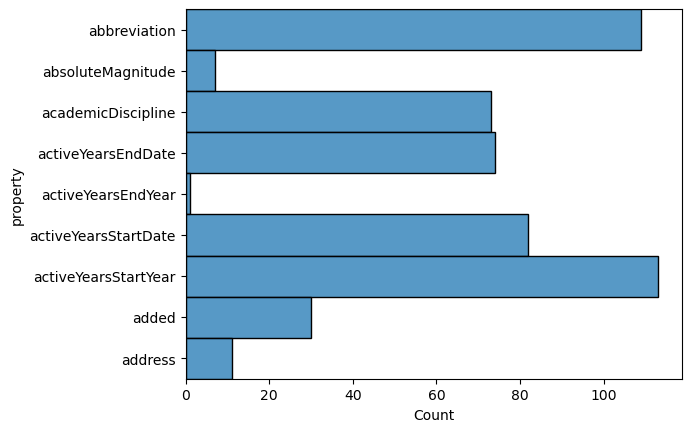

In [10]:
#plt.figure(figsize=(25, 100))
hist_train = sns.histplot(train_df, y="property")#, binwidth=5, discrete=True)
# https://stackoverflow.com/questions/73078993/reduce-spacing-between-bars-in-seaborn-hist-plot
plt.margins(y=0.000001)
plt.show()

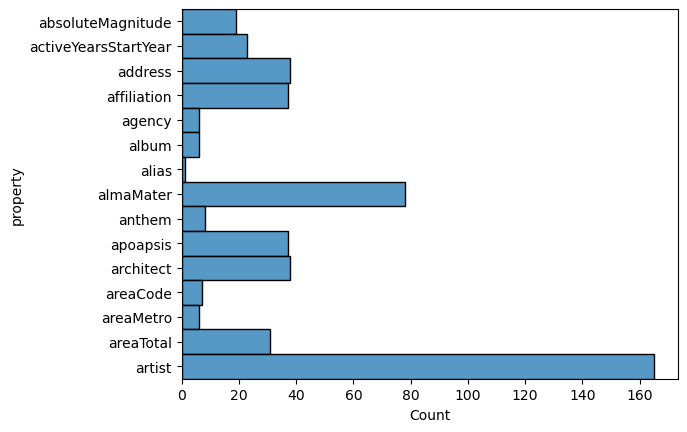

In [11]:
#plt.figure(figsize=(25, 40))
hist_test = sns.histplot(test_df, y="property")
# https://stackoverflow.com/questions/73078993/reduce-spacing-between-bars-in-seaborn-hist-plot
plt.margins(y=0.000001)
plt.show()

In [10]:
all_props = list(train_set | test_set)
all_props.sort()

In [11]:
excess = []  # Only shows excess in test set
unique = []  # Only properties strictly unique to test set
total_unique = 0
total_excess = 0
print('----------------------------------------------------------------------------')
for prop in all_props:
    if prop in train_set and prop in test_set:
        if test_counts[prop] - train_counts[prop] > 0:
            print(f"{prop} has {test_counts[prop] - train_counts[prop]} excess test examples.")
            excess.append([prop, test_counts[prop] - train_counts[prop]])
            total_excess += test_counts[prop] - train_counts[prop]
    elif prop in test_set:
        unique.append([prop, test_counts[prop]])
        print(f"{prop} has {test_counts[prop]} unique test examples.")
        total_unique += test_counts[prop]
print(f'\nOf shared properties, there are {total_excess} excess examples in the test set.')
print(f'There are {total_unique} / {len(test_props)} ({round(total_unique/len(test_props)*100, 4)}%) unique property entries in the test set.')
print(f'In total, {len(test_set-train_set)} / {len(test_set)} ({round(len(test_set-train_set)/len(test_set)*100, 4)}%) properties are unique to the test set.')
print('----------------------------------------------------------------------------')

unique.append(["total", total_unique])
excess.append(["total", total_excess])
dfUnique = pd.DataFrame(unique, columns=["property", "unique_count"])
dfExcess = pd.DataFrame(excess, columns=["property", "excess_count"])

----------------------------------------------------------------------------
absoluteMagnitude has 12 excess test examples.
address has 19 excess test examples.
album has 6 unique test examples.
areaMetro has 6 unique test examples.
artist has 169 unique test examples.
awardedBy has 6 excess test examples.
bird has 1 excess test examples.
birthName has 22 excess test examples.
brithPlace has 2 unique test examples.
broadcast has 15 excess test examples.
budget has 30 unique test examples.
buildDate has 9 unique test examples.
campus has 28 excess test examples.
ceremonialCounty has 2 unique test examples.
child has 13 excess test examples.
cinematography has 45 unique test examples.
citizenship has 39 unique test examples.
cosparId has 3 unique test examples.
currentTenants has 19 excess test examples.
currentclub has 2 excess test examples.
currentteam has 3 unique test examples.
deathDate has 21 excess test examples.
designation has 6 excess test examples.
director has 118 excess tes

In [9]:
dfUnique

,property,unique_count
0,album,6
1,areaMetro,6
2,artist,169
3,brithPlace,2
4,broadcastedBy,5
5,budget,30
6,buildDate,9
7,ceremonialCounty,2
8,cinematography,45
9,citizenship,39


In [12]:
dfExcess

,property,excess_count
0,absoluteMagnitude,12
1,address,19
2,awardedBy,6
3,bird,1
4,birthName,22
5,broadcast,10
6,campus,27
7,child,13
8,currentTenants,19
9,currentclub,2
